In [1]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cftime
import dask
import xarrayutils
import cartopy.crs as ccrs
from xmip.preprocessing import combined_preprocessing
from xmip.preprocessing import replace_x_y_nominal_lat_lon
from xmip.drift_removal import replace_time
from xmip.postprocessing import concat_experiments
import xmip.drift_removal as xm_dr
import xmip as xm
import xesmf as xe
import datetime
from dateutil.relativedelta import relativedelta
import utils
import cf_xarray as cfxr

from sklearn.linear_model import LinearRegression
import scipy.signal as signal
from scipy import stats
from datetime import timedelta

import seaborn as sns
import matplotlib as mpl
import cmocean
import cmocean.cm as cmo
from matplotlib.gridspec import GridSpec

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

import string
alphabet = list(string.ascii_lowercase)       

In [2]:
dask.config.set(**{'array.slicing.split_large_chunks': True})

# 1pct and 1pct 1000 GtC

In [3]:
model_run_pulse_dict = utils.model_run_pulse_dict
model_run_1pct_dict = utils.model_run_1pct_dict
model_run_control_dict = utils.model_run_picontrol_dict
model_run_cdr_pulse_dict = utils.model_run_cdr_pulse_dict
model_run_1pct1000gtc_dict = utils.model_run_1pct_1000gtc_dict
model_run_hist_co2_dict = utils.model_run_hist_co2_dict

In [4]:
A = utils.A
ds_out = utils.ds_out

In [5]:
ds_var = xr.open_dataset('Outputs/variance.nc')

mean_var = xr.open_dataset('Outputs/mean_variance.nc')

In [6]:
frac_uncert = xr.open_dataset('Outputs/frac_uncert.nc')

mean_frac = xr.open_dataset('Outputs/mean_frac_uncert.nc')['__xarray_dataarray_variable__']

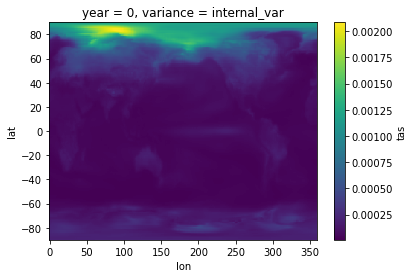

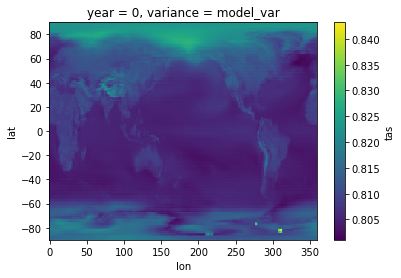

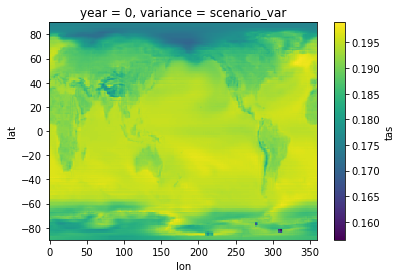

In [10]:
for var in ds_var.variance:
    fig, ax = plt.subplots()
    (ds_var.sel(variance = var)/ds_var.sum('variance')).isel(year = 0)['tas'].plot()

(0.0, 150.0)

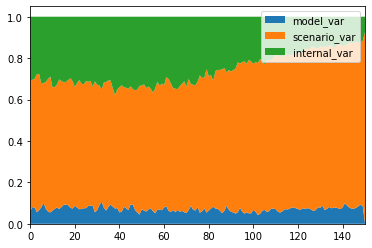

In [12]:
plt.stackplot(ds_var['year'], 
              ds_var['tas'].sel(variance = 'model_var')/ds_var['tas'].sum('variance'),
              ds_var['tas'].sel(variance = 'scenario_var')/ds_var['tas'].sum('variance'),
              ds_var['tas'].sel(variance = 'internal_var')/ds_var['tas'].sum('variance'),
              labels = ['model_var', 'scenario_var','internal_var']);
plt.legend()
plt.xlim(0,150)

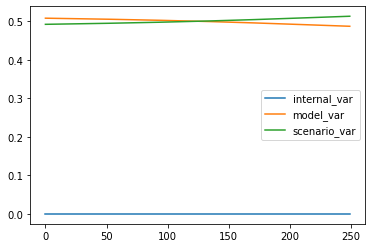

In [6]:
for var in ds_var.variance.values:
    plt.plot(ds_var['tas'].sel(variance = var)/ds_var['tas'].sum('variance'), label = var);
    plt.legend()

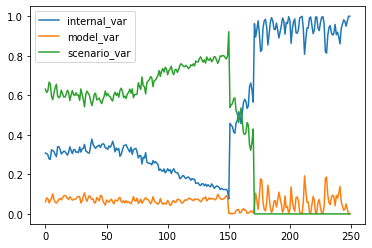

In [7]:
for var in ds_var.variance.values:
    plt.plot(ds_var['tas'].sel(variance = var)/ds_var['tas'].sum('variance'), label = var);
    plt.legend()

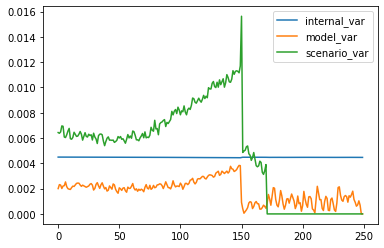

In [9]:
for var in frac_uncert.variance.values:
    plt.plot(frac_uncert['tas'].sel(variance = var), label = var);
    plt.legend()

## Hist CO2

In [ ]:
ds_intern_hist = xr.open_dataset('Outputs/hist_variance.nc')

In [13]:
ds_mean_intern_hist = xr.open_dataset('Outputs/hist_mean_variance.nc')

In [15]:
ds_mean_intern_hist.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    tas      float64 0.3704>